10. I denna uppgift ska vi använda MNIST-datan som vi arbetat med tidigare. Detta för att ha ett bekant dataset att arbeta med och experimentera med ANN-modeller. 


a) Träna en ANN-modell på MNIST-datan. Vad får du för resultat? 


In [1]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

# Define a function that will be used later
def display_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm).plot()

(10000, 784)
(10000,)
True label for the plotted image is: 4
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normali

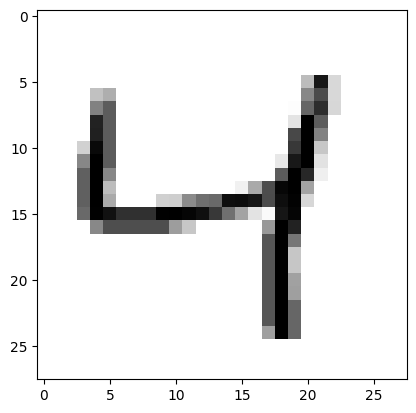

In [2]:
# Load data and inspect it
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False) # Download MNIST dataset
X = mnist["data"][:10000] # Use only first 10,000 samples for faster processing
y = mnist["target"][:10000].astype(np.uint8) # Convert labels to integers
print(X.shape)
print(y.shape)

some_digit = X[2] # Select a sample image
some_digit_image = some_digit.reshape(28, 28) # Reshape it to 28x28 pixels
plt.imshow(some_digit_image, cmap=mpl.cm.binary) # Display the image
print("True label for the plotted image is:", y[2]) # Print the true label

print(mnist.DESCR) # Print dataset description

In [3]:
# Splitting the data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% test data
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=2000, random_state=42) # 2000 samples for validation

# Scaling the data
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

c:\Users\hultb\Doom\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
c:\Users\hultb\Doom\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8435 - loss: 0.5386 - val_accuracy: 0.9030 - val_loss: 0.3730
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9538 - loss: 0.1584 - val_accuracy: 0.9225 - val_loss: 0.3589
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9782 - loss: 0.0809 - val_accuracy: 0.9270 - val_loss: 0.3587
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9902 - loss: 0.0435 - val_accuracy: 0.9290 - val_loss: 0.3659
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9950 - loss: 0.0232 - val_accuracy: 0.9315 - val_loss: 0.3694
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9987 - loss: 0.0117 - val_accuracy: 0.9365 - val_loss: 0.3717
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9998 - loss: 0.0061 - val_accuracy: 0.9375 - val_loss: 0.3913
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.

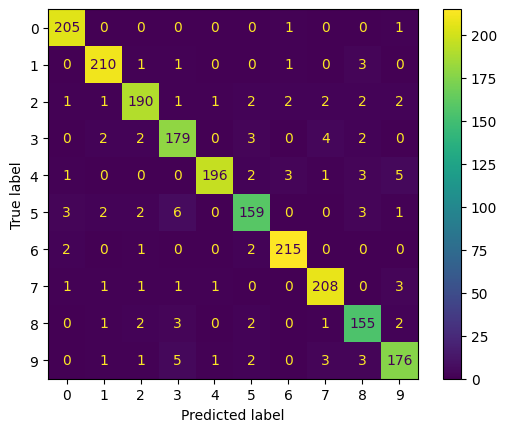

In [4]:
# Train an ANN model on the MNIST data
import tensorflow as tf
from tensorflow import keras
from keras import layers
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)), # input layer
    layers.Dense(64, activation='relu'), # hidden layer
    layers.Dense(10, activation='softmax') # output layer
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val)) 
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, y_pred))
display_confusion_matrix(y_test, y_pred)

b) Prova justera hyperparametrarna med *KerasTuner*. Notera, du har som vanligt dokumentationen till din hjälp. Får du bättre resultat? 


In [7]:
%pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


BASELINE MODEL (part a) - Fixed hyperparameters
Test accuracy (baseline): 0.9465
Reloading Tuner from my_dir\mnist_tuning\tuner0.json

HYPERPARAMETER TUNING with KerasTuner

Optimal hyperparameters found:
  - First layer units: 192
  - Second layer units: 352
  - Learning rate: 0.001

Training tuned model...
Epoch 1/10


c:\Users\hultb\Doom\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8543 - loss: 0.4905 - val_accuracy: 0.8995 - val_loss: 0.3672
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9577 - loss: 0.1491 - val_accuracy: 0.9070 - val_loss: 0.3922
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9802 - loss: 0.0705 - val_accuracy: 0.9265 - val_loss: 0.3896
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9918 - loss: 0.0323 - val_accuracy: 0.9330 - val_loss: 0.4377
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9937 - loss: 0.0210 - val_accuracy: 0.9260 - val_loss: 0.4822
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9988 - loss: 0.0087 - val_accuracy: 0.9365 - val_loss: 0.4655
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.9365 - val_loss: 0.4945
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9365 - val_

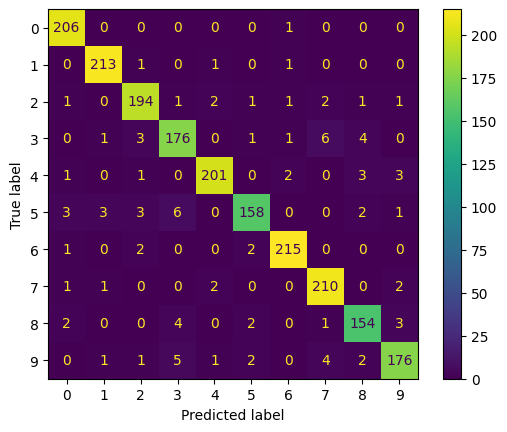

In [6]:
# Adjust the hyperparameters with KerasTuner
import keras_tuner as kt

# Store the baseline result from part a)
print("=" * 60)
print("BASELINE MODEL (part a) - Fixed hyperparameters")
print("=" * 60)
baseline_accuracy = test_acc
print(f"Test accuracy (baseline): {baseline_accuracy:.4f}")

# Define the build_model function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(
        units=hp.Int('units_1', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape=(784,)
    ))
    model.add(layers.Dense(
        units=hp.Int('units_2', min_value=32, max_value=512, step=32),
        activation='relu'
    ))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='mnist_tuning'
)

# Run the hyperparameter search
print("\n" + "=" * 60)
print("HYPERPARAMETER TUNING with KerasTuner")
print("=" * 60)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"\nOptimal hyperparameters found:")
print(f"  - First layer units: {best_hps.get('units_1')}")
print(f"  - Second layer units: {best_hps.get('units_2')}")
print(f"  - Learning rate: {best_hps.get('learning_rate')}")

# Build and train the tuned model
print("\nTraining tuned model...")
tuned_model = tuner.hypermodel.build(best_hps)
tuned_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Evaluate the tuned model
print("\n" + "=" * 60)
print("TUNED MODEL RESULTS")
print("=" * 60)
test_loss_tuned, tuned_accuracy = tuned_model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy (tuned): {tuned_accuracy:.4f}')
y_pred_tuned = np.argmax(tuned_model.predict(X_test), axis=-1)
print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))
display_confusion_matrix(y_test, y_pred_tuned)

# COMPARISON
print("\n" + "=" * 60)
print("COMPARISON: Baseline vs Tuned Model")
print("=" * 60)
improvement = (tuned_accuracy - baseline_accuracy) * 100
print(f"\nBaseline accuracy:    {baseline_accuracy:.4f}")
print(f"Tuned accuracy:       {tuned_accuracy:.4f}")
print(f"\nImprovement:          {improvement:+.2f} percentage points")

if improvement > 0:
    print(f"\n✓ KerasTuner improved the model by {improvement:.2f}%")
elif improvement < 0:
    print(f"\n✗ KerasTuner decreased performance by {abs(improvement):.2f}%")
else:
    print(f"\n≈ No difference between baseline and tuned model")
